In [1]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import * 
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

In [2]:
df = pd.read_csv(r'D:\Courses\Prodigy Intern\Task2\titanic\train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# dimenstions of dataset
df.shape

(891, 12)

In [6]:
#see data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Depending on Meta data upove, some columns will change its type. =)

In [7]:
df['Survived'] = df['Survived'].astype('object')
df['Pclass'] = df['Pclass'].astype('object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


In [9]:
#check null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
(df.isnull().sum()/(len(df)))*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

We find some null values in columns:
- "Cabin" has 77% of null values -> can be dropped
- "Age" has 19.8 of null values -> can be handled
- "Embarked" has 0.22 of null values -> can be handed

#### Handle Age Null values
It could be handled by replacing the null values using "Median"

In [11]:
df['Age'] = df['Age'].fillna(df['Age'].median())

#### Handle "Embarked" Null Values
It can be replaced by the most frequent value

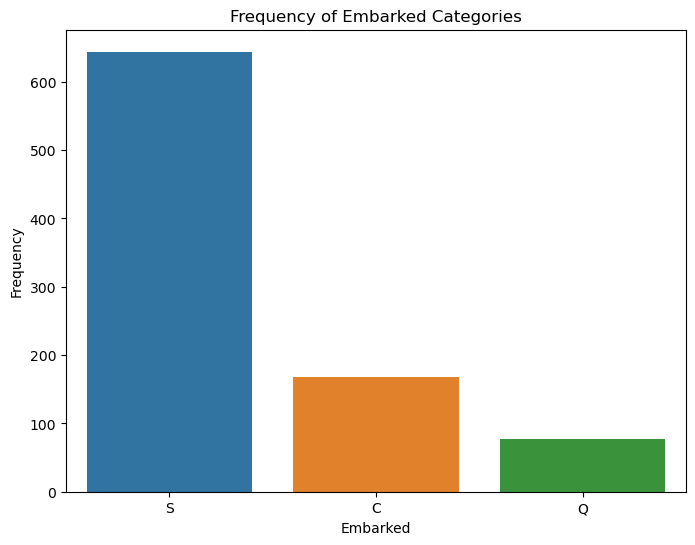

<Figure size 100x100 with 0 Axes>

In [12]:
# Draw a barchart to see the most frequent values
# Count the frequency of each category in the 'Embarked' column
embarked_counts = df['Embarked'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=embarked_counts.index, y=embarked_counts.values)
plt.title('Frequency of Embarked Categories')
plt.xlabel('Embarked')
plt.ylabel('Frequency')
plt.figure(figsize=(1,1)) 
plt.show()

In [13]:
# Filling missing values
df['Embarked'] = df['Embarked'].fillna('S')

#### Drop "Cabin" Column
It has many null values so it's useless

In [14]:
df.drop(['Cabin'], inplace=True, axis=1)

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Check for Duplication:

In [16]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

#### Data Reduction

Drop any unrelevent columns like name and id

In [17]:
df = df.drop(['Name'], axis = 1)
df = df.drop(['PassengerId'], axis = 1)
df = df.drop(['Ticket'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 55.8+ KB


#### Summary statistics


In [18]:
df.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.361582,0.523008,0.381594,32.204208
std,13.019697,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


#### Before we do EDA, Separate Numerical variables and categorical variables

In [19]:
cat_cols = df.select_dtypes(include = ['object', 'category']).columns
cat_cols

Index(['Survived', 'Pclass', 'Sex', 'Embarked'], dtype='object')

In [20]:
num_cols = df.select_dtypes(include = ['int64', 'float64'])
num_cols

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500
...,...,...,...,...
886,27.0,0,0,13.0000
887,19.0,0,0,30.0000
888,28.0,1,2,23.4500
889,26.0,0,0,30.0000


# Univariate Analysis

### Numerical variables

Age
Skew : 0.51


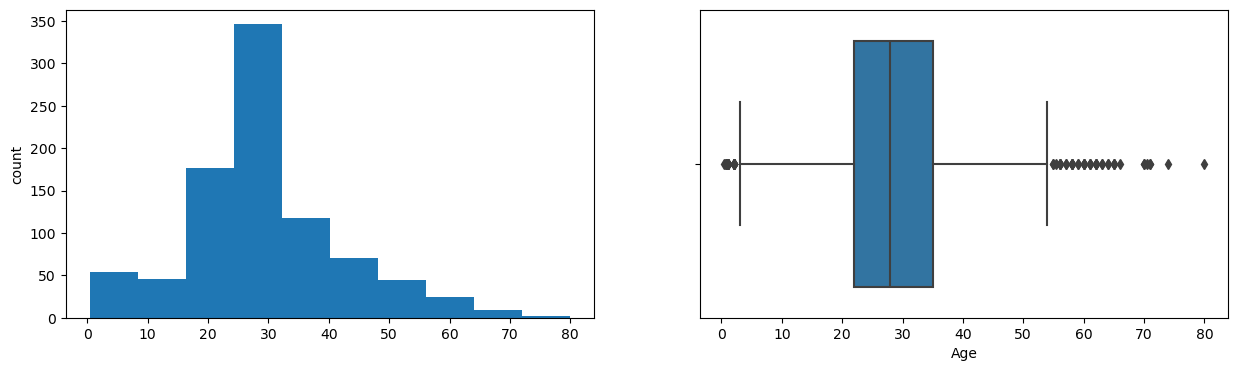

SibSp
Skew : 3.7


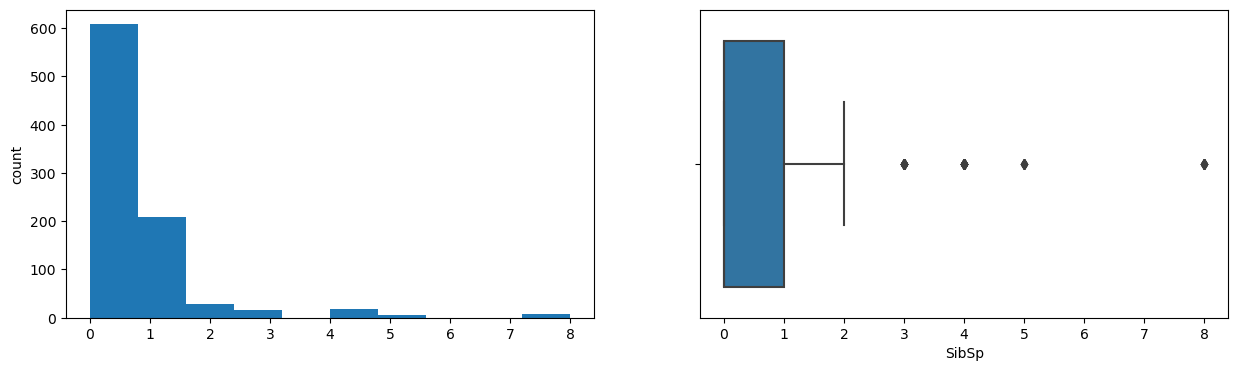

Parch
Skew : 2.75


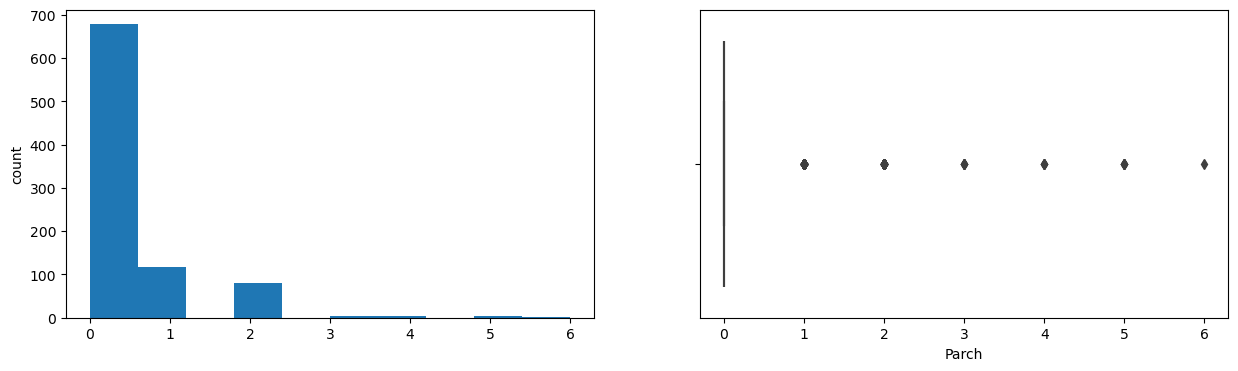

Fare
Skew : 4.79


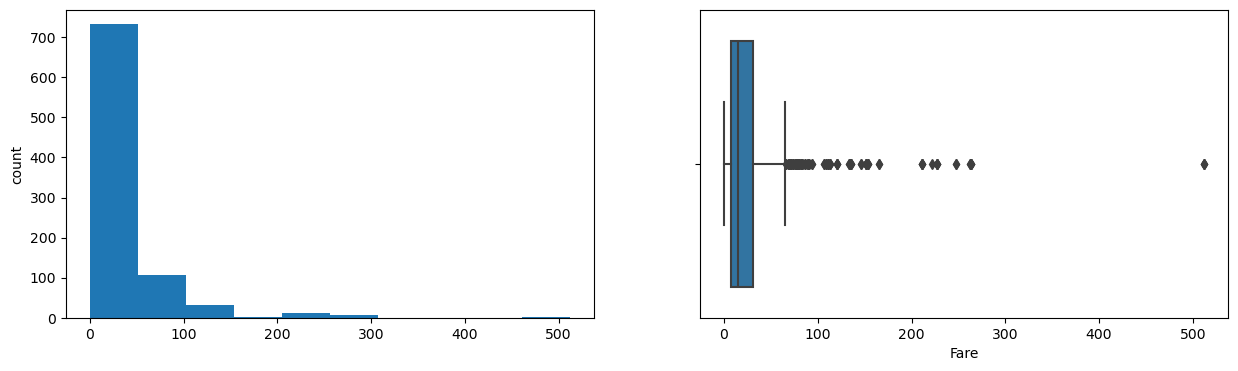

In [21]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

It's found that "Fare", "SipSp", "Age", and "Prach" have outliers. It's okay to handle them first.

### Handling outliers

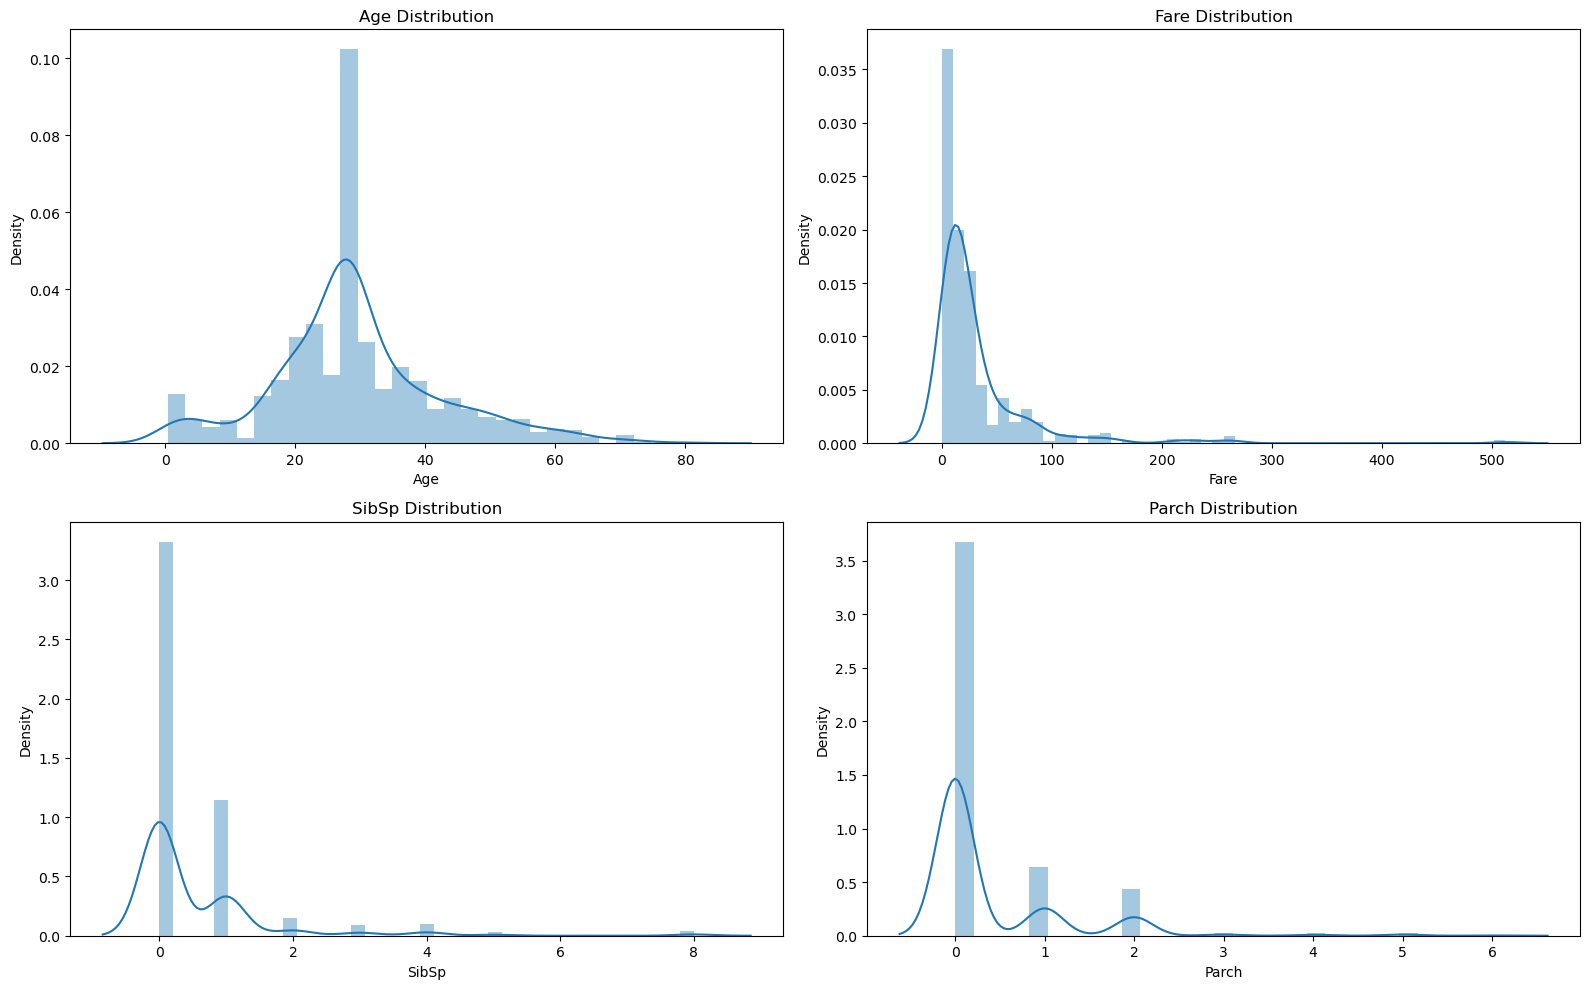

In [22]:
plt.figure(figsize=(16,10))

# Plotting the first figure
plt.subplot(2, 2, 1)
sns.distplot(df['Age'])
plt.title('Age Distribution')

# Plotting the second figure
plt.subplot(2, 2, 2)
sns.distplot(df['Fare'])
plt.title('Fare Distribution')

# Plotting the third figure
plt.subplot(2, 2, 3)
sns.distplot(df['SibSp'])
plt.title('SibSp Distribution')

# Plotting the fourth figure
plt.subplot(2, 2, 4)
sns.distplot(df['Parch'])
plt.title('Parch Distribution')

plt.tight_layout()
plt.show()

#### Detect outliers

In [23]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

#### Locate outliers

In [24]:
df.loc[detect_outliers(df,["Age","SibSp","Parch","Fare"])]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
7,0,3,male,2.00,3,1,21.0750,S
16,0,3,male,2.00,4,1,29.1250,Q
119,0,3,female,2.00,4,2,31.2750,S
164,0,3,male,1.00,4,1,39.6875,S
268,1,1,female,58.00,0,1,153.4625,S
297,0,1,female,2.00,1,2,151.5500,S
305,1,1,male,0.92,1,2,151.5500,S
386,0,3,male,1.00,5,2,46.9000,S
438,0,1,male,64.00,1,4,263.0000,S
587,1,1,male,60.00,1,1,79.2000,C


#### Drop Outliers

In [25]:
df = df.drop(detect_outliers(df,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

### Categorical variables

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (9, 9))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Survived', data = df, color = 'blue', 
              order = df['Survived'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Pclass', data = df, color = 'blue', 
              order = df['Pclass'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Sex', data = df, color = 'blue', 
              order = df['Sex'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Embarked', data = df, color = 'blue', 
              order = df['Embarked'].value_counts().index);


# Bivariante Analysis

### Heatmap to see the correlation between different variables

Convert categorical features to numerical

In [33]:
df["Sex"] = [1 if i == "male" else 0 for i in df["Sex"]] 
df["Embarked"] = [0 if i == "S" else i for i in df["Embarked"]] 
df["Embarked"] = [1 if i == "C" else i for i in df["Embarked"]] 
df["Embarked"] = [2 if i == "Q" else i for i in df["Embarked"]] 

Calculate the correlation coefficient

In [34]:
cols = ["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]

In [36]:
df_corr = df[cols].corr()
df_corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.332715,-0.551350,-0.084046,0.031316,0.107628,0.273395,0.103957
Pclass,-0.332715,1.000000,0.132578,-0.331819,0.046003,0.034206,-0.548342,0.048890
Sex,-0.551350,0.132578,1.000000,0.084235,-0.148964,-0.256593,-0.186090,-0.123997
Age,-0.084046,-0.331819,0.084235,1.000000,-0.243609,-0.179068,0.097626,-0.018948
SibSp,0.031316,0.046003,-0.148964,-0.243609,1.000000,0.365628,0.112261,-0.028849
Parch,0.107628,0.034206,-0.256593,-0.179068,0.365628,1.000000,0.144872,-0.063914
Fare,0.273395,-0.548342,-0.186090,0.097626,0.112261,0.144872,1.000000,0.085511
Embarked,0.103957,0.048890,-0.123997,-0.018948,-0.028849,-0.063914,0.085511,1.000000


Draw the heatmap

<Axes: >

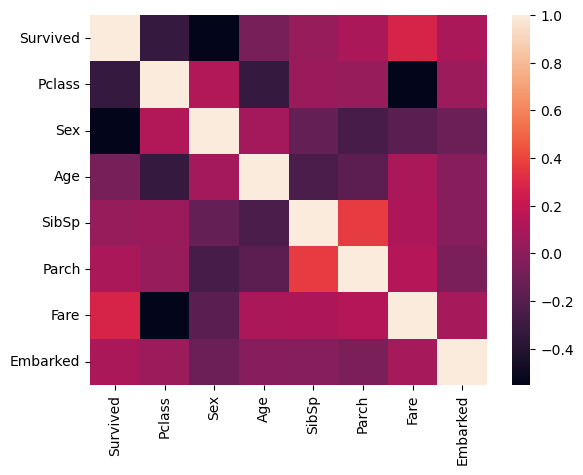

In [53]:
sns.heatmap(df_corr)

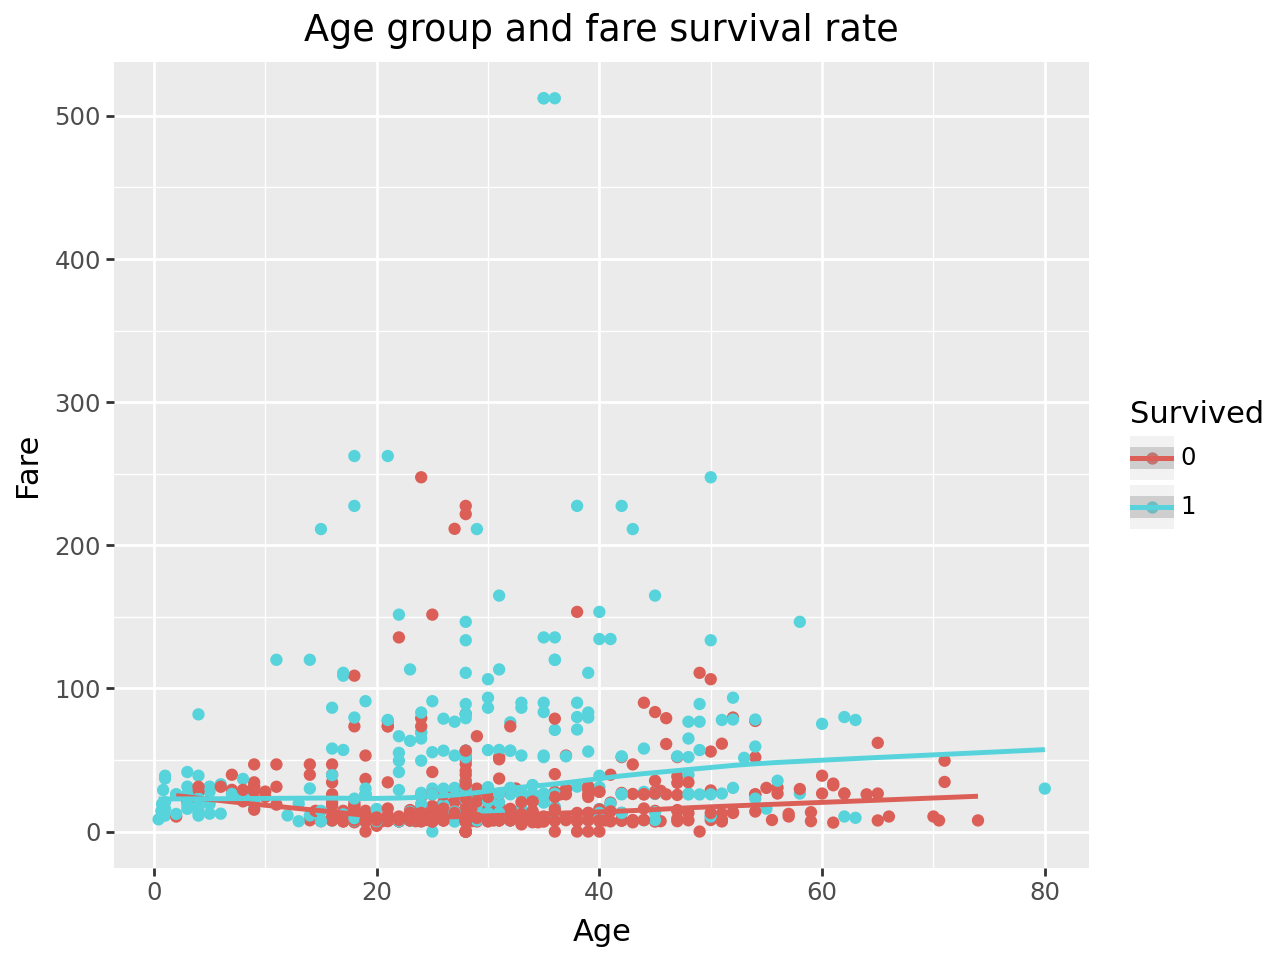

In [27]:
(ggplot(df)
 + aes(x='Age', y='Fare', color='Survived')
 + geom_point()
 + stat_smooth()
 + ggtitle('Age group and fare survival rate')
)

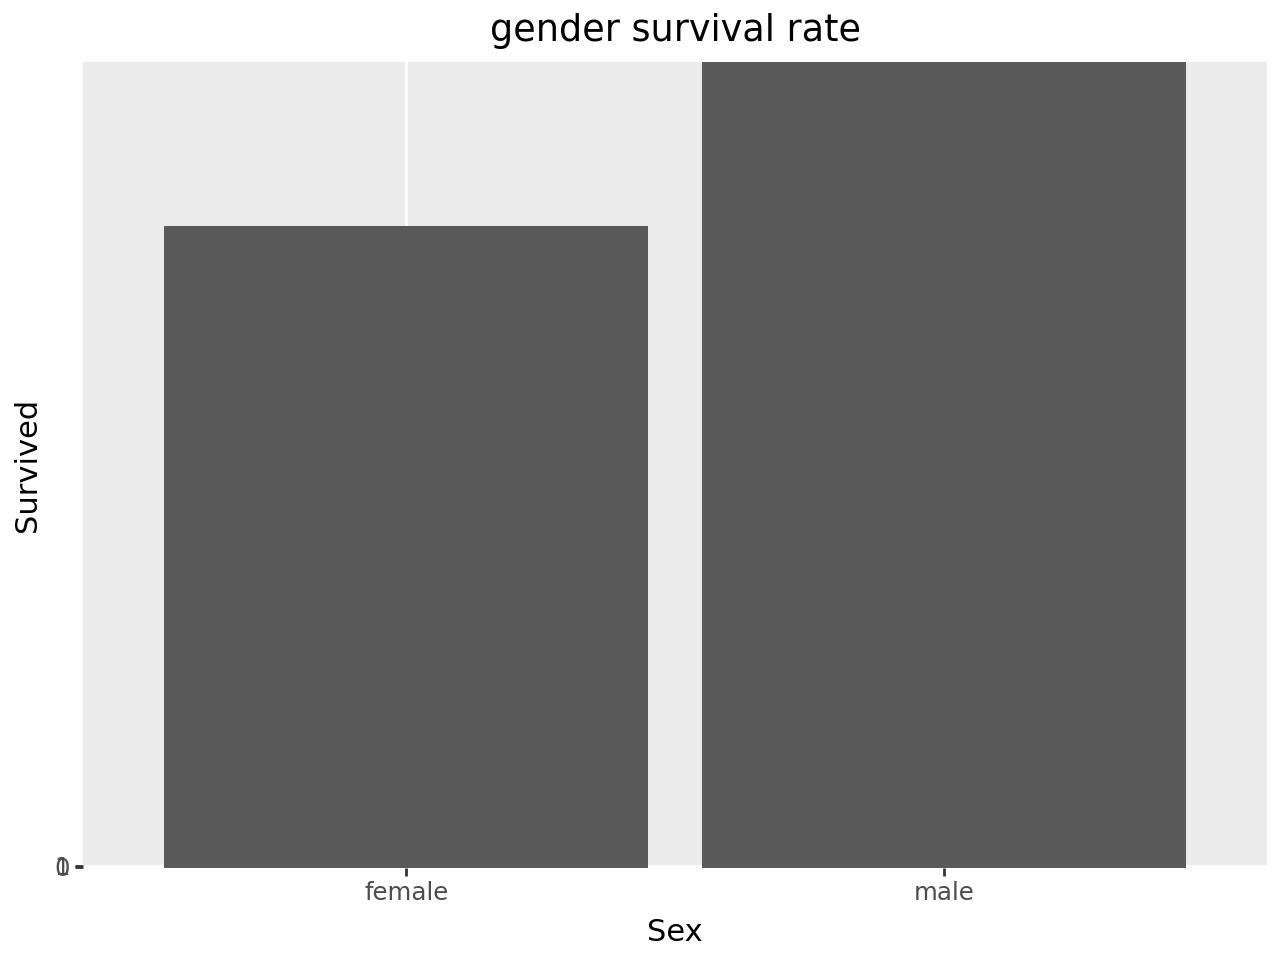

In [28]:
(ggplot(df)
 + aes(x='Sex', y='Survived')
 + geom_col()
 + ggtitle('gender survival rate')
)

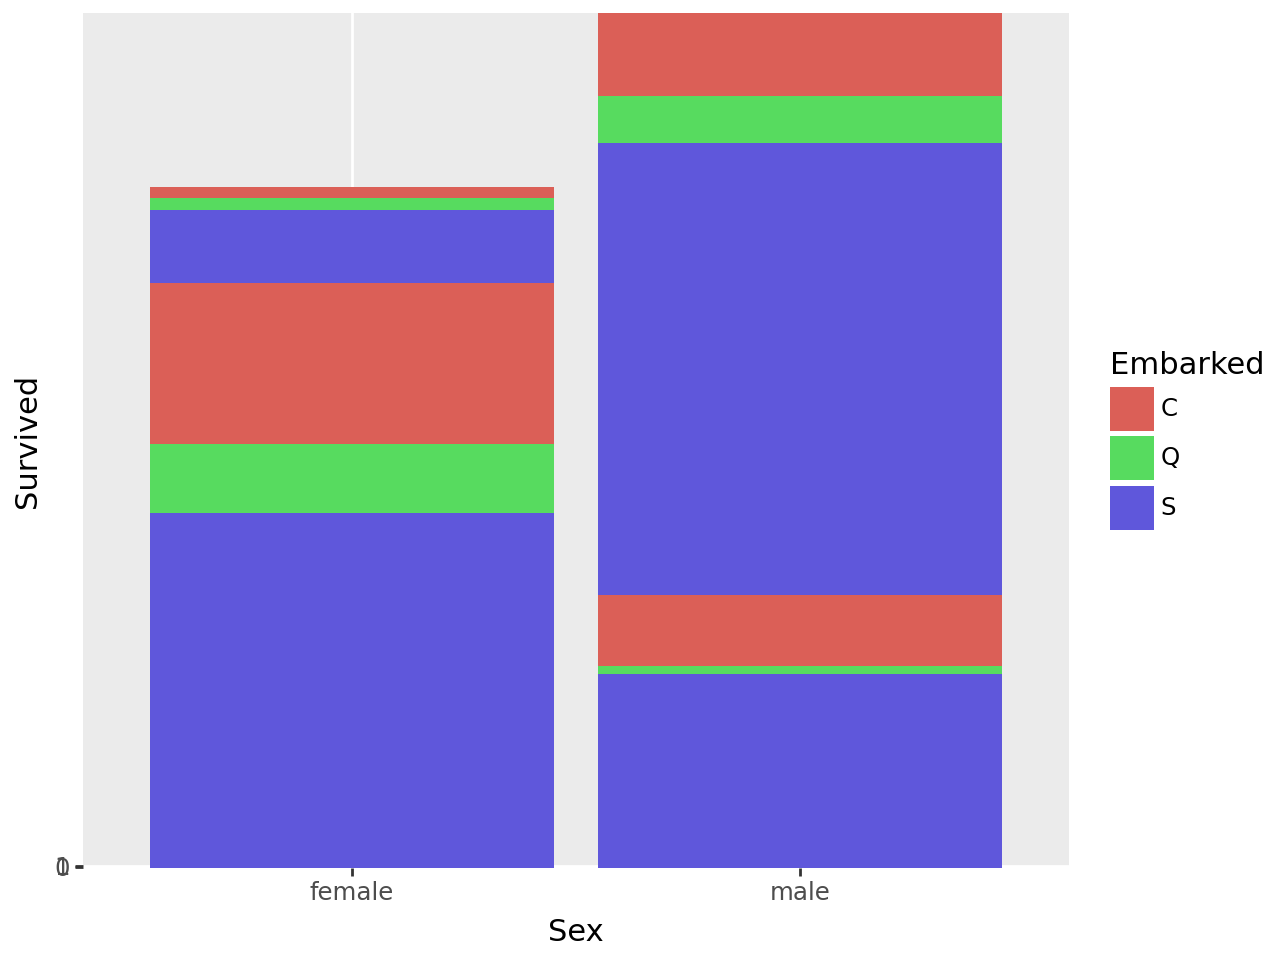

In [29]:
(ggplot(df)
 + aes(x='Sex', y='Survived', fill='Embarked')
 + geom_col()
)

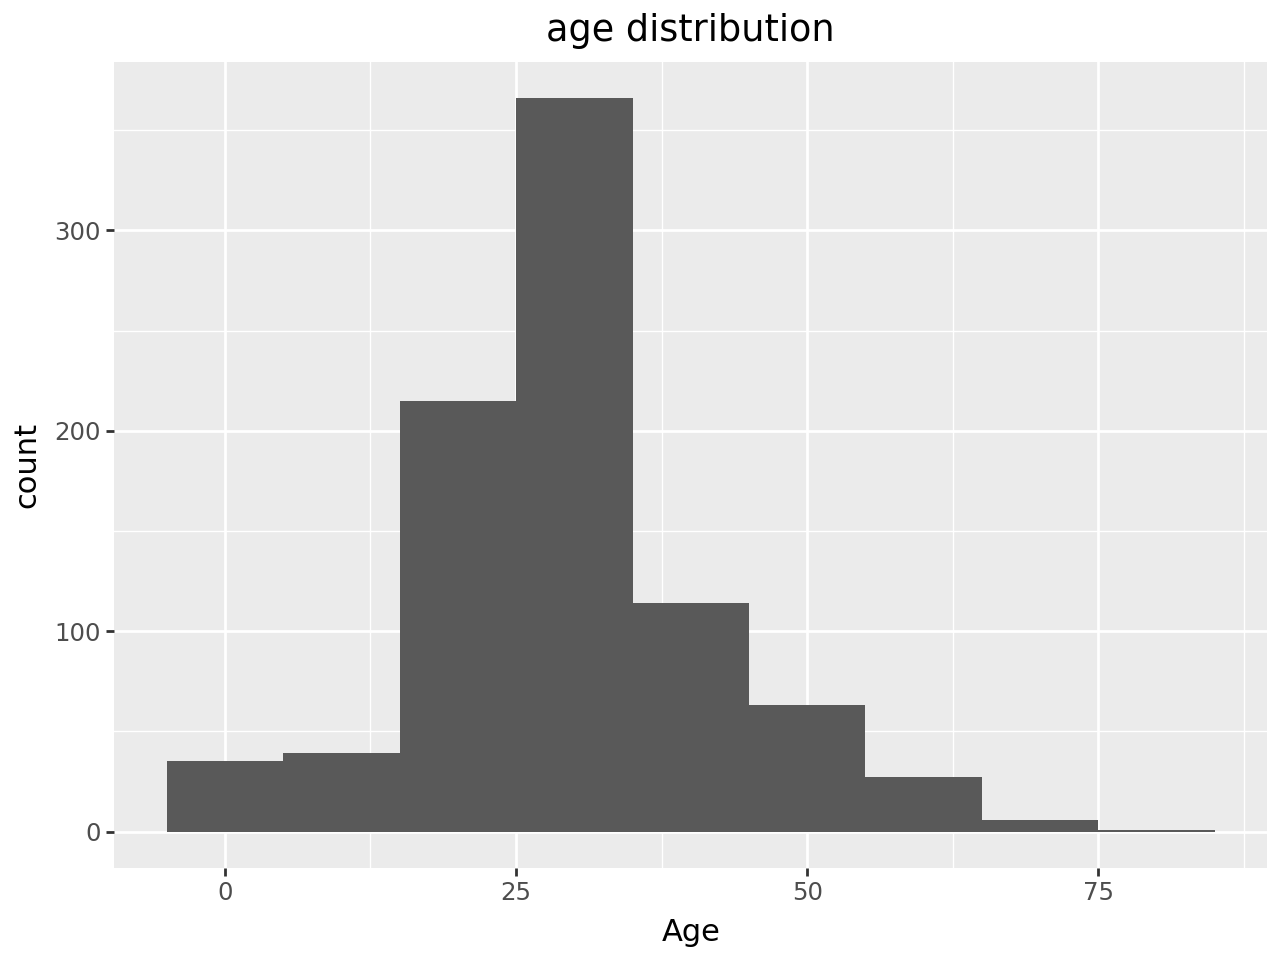

In [30]:
(ggplot(df) 
 + aes(x='Age')
 + geom_histogram(binwidth=10)
 + ggtitle('age distribution')
)

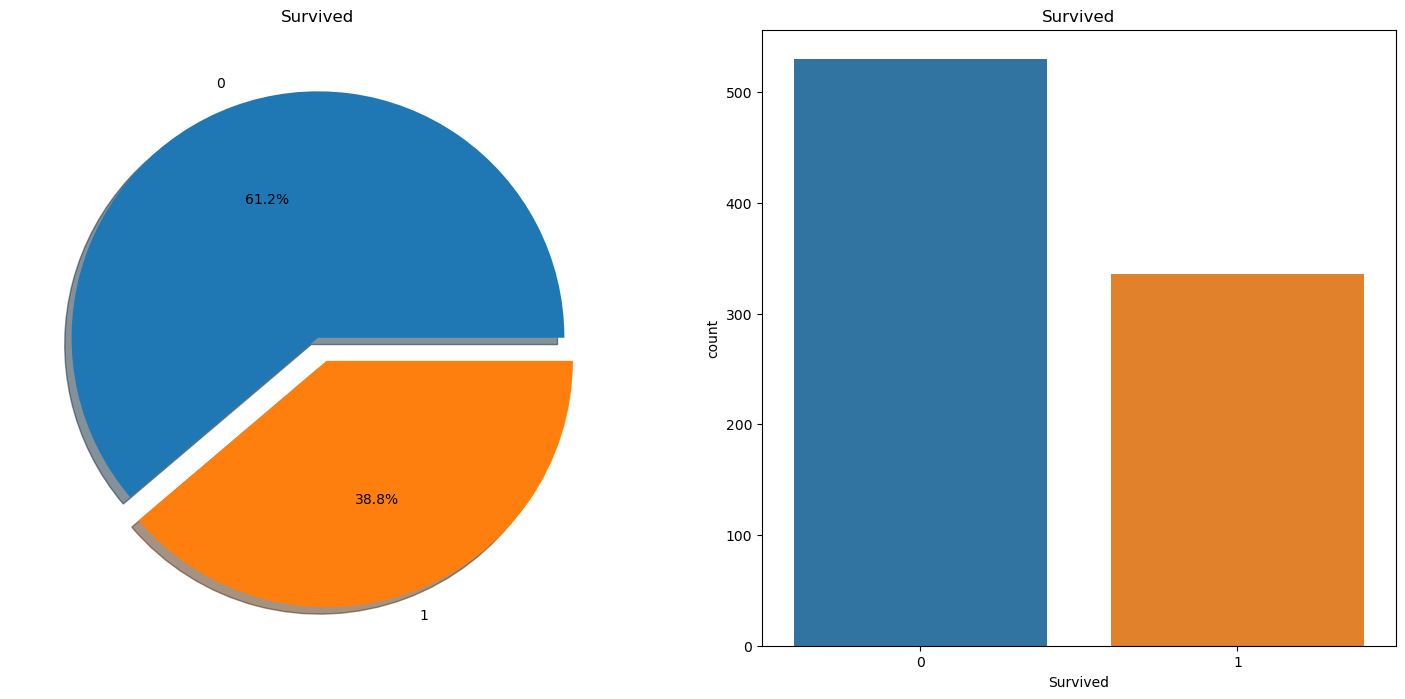

In [31]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart showing distribution of 'Survived' variable
df['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

# Count plot showing distribution of 'Survived' variable
sns.countplot(x='Survived', data=df, ax=ax[1])  # Note the x argument for specifying the column name
ax[1].set_title('Survived')

plt.show()